# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-1-210-MI1_CRR_DiadFit,103.309828,0.009298,1285.663611,0.008594,252.373655,1285.663611,422.320344,0.643269,2.887425,...,1.017208,0.079119,0.005098,1.127869,1.130952,0.137810,0.002352,PseudoVoigtModel,PseudoVoigtModel,No
1,187-1-210-MI2-rep2,103.650563,0.013245,1284.908123,0.012272,269.655421,1284.908123,637.966719,0.838005,4.186562,...,1.237129,0.401192,0.006215,1.050000,1.011009,0.065399,0.002492,PseudoVoigtModel,PseudoVoigtModel,No
2,187-1-211-MI2-46mw_CRR_DiadFit,103.242118,0.024266,1285.875759,0.021009,355.630578,1285.875759,503.437937,0.556712,9.671683,...,1.136674,0.150640,0.003131,1.126316,1.132468,0.127180,0.001640,PseudoVoigtModel,PseudoVoigtModel,No
3,187-1-211-MI2-12mw,103.286143,0.027452,1285.778306,0.024228,107.501324,1285.778306,173.609746,0.651881,3.548274,...,1.182952,0.221328,0.012128,1.033784,1.041975,0.034387,0.005130,PseudoVoigtModel,PseudoVoigtModel,No
4,187-1-211-MI2,103.280355,0.036671,1285.777967,0.030643,64.811945,1285.777967,94.200868,0.543719,2.667660,...,1.046667,0.012357,0.016778,1.021429,1.005038,0.020629,0.008178,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'02 FG04-A1-4-start.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 52/52 [00:00<00:00, 116.66it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start.txt,"August 21, 2024\n",August,21.0,6.054,45.0,5.0,50.0,"['0h', '3m', '46s']",9:15:04 AM\n,33304.0,1324.964
1,187-1-210-MI1-12mw.txt,"August 21, 2024\n",August,21.0,11.977,60.0,4.0,50.0,"['0h', '4m', '2s']",2:47:24 PM\n,53244.0,1324.964
2,187-1-210-MI1.txt,"August 21, 2024\n",August,21.0,5.997,60.0,4.0,50.0,"['0h', '4m', '1s']",2:51:55 PM\n,53515.0,1324.964
3,187-1-210-MI2-rep1.txt,"August 21, 2024\n",August,21.0,6.000,60.0,4.0,50.0,"['0h', '4m', '1s']",2:57:04 PM\n,53824.0,1324.964
4,187-1-210-MI2-rep2.txt,"August 21, 2024\n",August,21.0,6.001,60.0,4.0,50.0,"['0h', '4m', '1s']",3:01:48 PM\n,54108.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start', '187-1-210-MI1-12mw', '187-1-210-MI1',
       '187-1-210-MI2-rep1', '187-1-210-MI2-rep2', '187-1-210-MI2-rep3',
       '187-1-210-MI3', '187-1-210-MI4', '187-1-211-MI2-46mw',
       '187-1-211-MI2-12mw', '187-1-211-MI2', '187-1-211-FI2',
       '187-1-211-FI3', '187-1-211-FI1', '187-1-213-FIC-49mw-weak',
       '187-1-213-FIC', '187-9-201-MIA', '187-9-202-MID-49mw-weak',
       '187-9-202-MIE-49mw-weak', 'FG04-A1-4-end'], dtype=object)

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-210-MI1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-210-MI1', '187-1-210-MI2-rep2', '187-1-211-MI2-46mw',
       '187-1-211-MI2-12mw', '187-1-211-MI2', '187-1-211-FI2',
       '187-1-211-FI3', '187-1-211-FI1', '187-1-213-FIC-49mw-weak',
       '187-1-213-FIC', '187-9-201-MIA', '187-9-202-MID-49mw-weak',
       '187-9-202-MIE-49mw-weak', '187-1-210-MI1-12mw',
       '187-1-210-MI2-rep1', '187-1-210-MI2-rep3', '187-1-210-MI3',
       '187-1-210-MI4', 'FG04-A1-4-start', 'FG04-A1-4-end'], dtype='<U23')

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-210-MI1,103.309828,0.009298,1285.663611,0.008594,252.373655,1285.663611,422.320344,0.643269,2.887425,...,August,21.0,5.997,60.0,4.0,50.0,"['0h', '4m', '1s']",2:51:55 PM\n,53515.0,1324.964
1,187-1-210-MI2-rep2,103.650563,0.013245,1284.908123,0.012272,269.655421,1284.908123,637.966719,0.838005,4.186562,...,August,21.0,6.001,60.0,4.0,50.0,"['0h', '4m', '1s']",3:01:48 PM\n,54108.0,1324.964
2,187-1-211-MI2-46mw,103.242118,0.024266,1285.875759,0.021009,355.630578,1285.875759,503.437937,0.556712,9.671683,...,August,21.0,46.127,60.0,1.0,50.0,"['0h', '1m', '1s']",3:40:36 PM\n,56436.0,1324.964
3,187-1-211-MI2-12mw,103.286143,0.027452,1285.778306,0.024228,107.501324,1285.778306,173.609746,0.651881,3.548274,...,August,21.0,11.961,60.0,4.0,50.0,"['0h', '4m', '2s']",3:42:45 PM\n,56565.0,1324.964
4,187-1-211-MI2,103.280355,0.036671,1285.777967,0.030643,64.811945,1285.777967,94.200868,0.543719,2.667660,...,August,21.0,6.023,60.0,4.0,50.0,"['0h', '4m', '1s']",3:50:01 PM\n,57001.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.164550688852021e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-210-MI1,0.137467,0.005338,0.003682,0.003864,103.097184,0.009293,0.000518,0.009298,5.997,...,53515.0,NaN,NaN,NaN,NaN,NaN,53515.0,0.997942,0.997937,0.997947
1,187-1-210-MI2-rep2,0.280499,0.006048,0.005571,0.002354,103.437254,0.013228,0.000521,0.013245,6.001,...,54108.0,1092.546047,1128.569659,78.627017,Spline,0.712503,54108.0,0.997942,0.997937,0.997947
2,187-1-211-MI2-46mw,0.110747,0.010328,0.009598,0.003815,103.029749,0.024222,0.000525,0.024266,46.127,...,56436.0,1096.055639,1011.797091,85.781390,Spline,0.809233,56436.0,0.997943,0.997938,0.997948
3,187-1-211-MI2-12mw,0.128156,0.011517,0.010857,0.003843,103.073686,0.027401,0.000525,0.027452,11.961,...,56565.0,1093.287510,483.416237,31.756257,Spline,1.144043,56565.0,0.997943,0.997938,0.997948
4,187-1-211-MI2,0.125870,0.015002,0.014502,0.003838,103.067917,0.036600,0.000527,0.036671,6.023,...,57001.0,1094.819867,365.836387,31.505954,Spline,1.474242,57001.0,0.997943,0.997938,0.997948


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.164550688852021e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-210-MI1,0.137467,0.005338,0.003682,0.003864,103.097184,0.009293,0.000518,0.009298,5.997,...,53515.0,NaN,NaN,NaN,NaN,NaN,53515.0,0.997942,0.997937,0.997947
1,187-1-210-MI2-rep2,0.280499,0.006048,0.005571,0.002354,103.437254,0.013228,0.000521,0.013245,6.001,...,54108.0,1092.546047,1128.569659,78.627017,Spline,0.712503,54108.0,0.997942,0.997937,0.997947
2,187-1-211-MI2-46mw,0.110747,0.010328,0.009598,0.003815,103.029749,0.024222,0.000525,0.024266,46.127,...,56436.0,1096.055639,1011.797091,85.781390,Spline,0.809233,56436.0,0.997943,0.997938,0.997948
3,187-1-211-MI2-12mw,0.128156,0.011517,0.010857,0.003843,103.073686,0.027401,0.000525,0.027452,11.961,...,56565.0,1093.287510,483.416237,31.756257,Spline,1.144043,56565.0,0.997943,0.997938,0.997948
4,187-1-211-MI2,0.125870,0.015002,0.014502,0.003838,103.067917,0.036600,0.000527,0.036671,6.023,...,57001.0,1094.819867,365.836387,31.505954,Spline,1.474242,57001.0,0.997943,0.997938,0.997948


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_August 21, 2024_fitted_2024-08-22.xlsx


## This helps visualize the errors on each spectra 

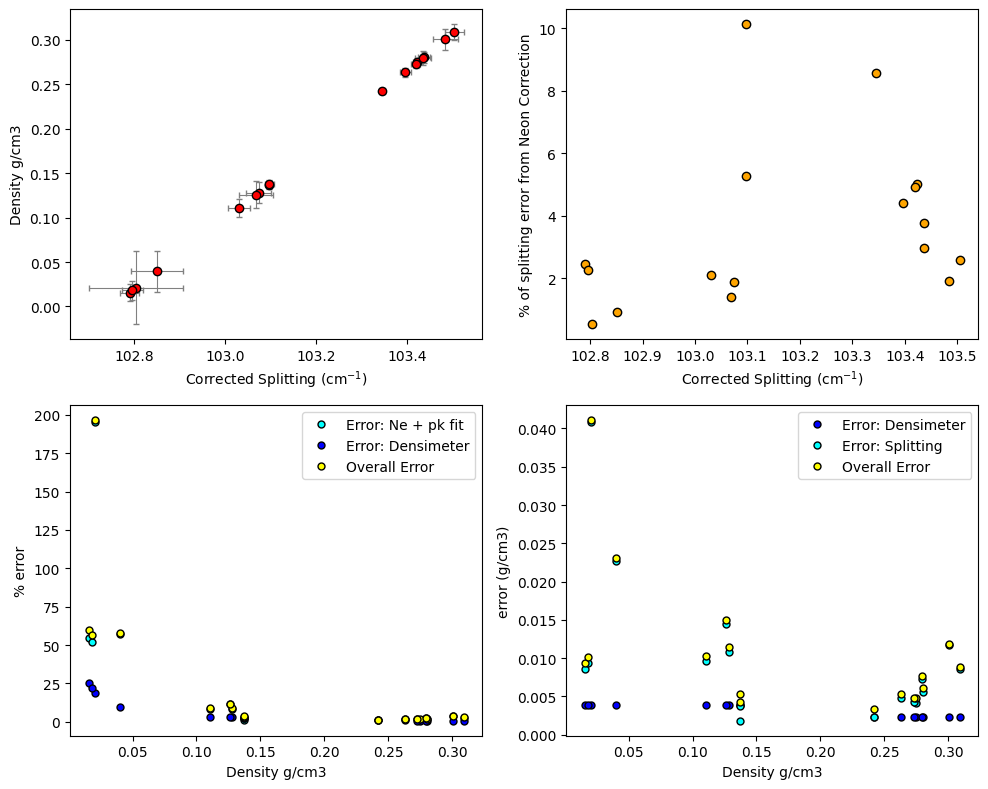

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

In [21]:
df

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
13,187-1-210-MI1-12mw,0.137126,0.004274,0.001827,0.003864,103.096322,0.004610,0.000518,0.004590,11.977,...,53244.0,1095.314176,294.151603,26.669907,Spline,0.121743,53244.0,0.997942,0.997936,0.997947
0,187-1-210-MI1,0.137467,0.005338,0.003682,0.003864,103.097184,0.009293,0.000518,0.009298,5.997,...,53515.0,NaN,NaN,NaN,NaN,NaN,53515.0,0.997942,0.997937,0.997947
14,187-1-210-MI2-rep1,0.274594,0.004751,0.004126,0.002355,103.423215,0.009820,0.000520,0.009826,6.000,...,53824.0,1093.188649,1104.920741,77.645570,Spline,0.462834,53824.0,0.997942,0.997937,0.997947
1,187-1-210-MI2-rep2,0.280499,0.006048,0.005571,0.002354,103.437254,0.013228,0.000521,0.013245,6.001,...,54108.0,1092.546047,1128.569659,78.627017,Spline,0.712503,54108.0,0.997942,0.997937,0.997947
15,187-1-210-MI2-rep3,0.272956,0.004830,0.004217,0.002355,103.419316,0.010042,0.000522,0.010050,6.004,...,54436.0,1095.857916,776.899005,52.423939,Spline,0.356316,54436.0,0.997942,0.997937,0.997947
16,187-1-210-MI3,0.242281,0.003307,0.002318,0.002359,103.345847,0.005582,0.000522,0.005569,6.003,...,54801.0,1095.413038,542.874220,46.057157,Spline,0.141731,54801.0,0.997942,0.997937,0.997947
17,187-1-210-MI4,0.263535,0.005296,0.004743,0.002356,103.396839,0.011336,0.000523,0.011348,6.000,...,55138.0,NaN,NaN,NaN,NaN,NaN,55138.0,0.997943,0.997938,0.997948
2,187-1-211-MI2-46mw,0.110747,0.010328,0.009598,0.003815,103.029749,0.024222,0.000525,0.024266,46.127,...,56436.0,1096.055639,1011.797091,85.781390,Spline,0.809233,56436.0,0.997943,0.997938,0.997948
3,187-1-211-MI2-12mw,0.128156,0.011517,0.010857,0.003843,103.073686,0.027401,0.000525,0.027452,11.961,...,56565.0,1093.287510,483.416237,31.756257,Spline,1.144043,56565.0,0.997943,0.997938,0.997948
4,187-1-211-MI2,0.125870,0.015002,0.014502,0.003838,103.067917,0.036600,0.000527,0.036671,6.023,...,57001.0,1094.819867,365.836387,31.505954,Spline,1.474242,57001.0,0.997943,0.997938,0.997948


In [17]:

df[df['filename'].str.contains("MI")]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
13,187-1-210-MI1-12mw,0.137126,0.004274,0.001827,0.003864,103.096322,0.004610,0.000518,0.004590,11.977,...,53244.0,1095.314176,294.151603,26.669907,Spline,0.121743,53244.0,0.997942,0.997936,0.997947
0,187-1-210-MI1,0.137467,0.005338,0.003682,0.003864,103.097184,0.009293,0.000518,0.009298,5.997,...,53515.0,NaN,NaN,NaN,NaN,NaN,53515.0,0.997942,0.997937,0.997947
14,187-1-210-MI2-rep1,0.274594,0.004751,0.004126,0.002355,103.423215,0.009820,0.000520,0.009826,6.000,...,53824.0,1093.188649,1104.920741,77.645570,Spline,0.462834,53824.0,0.997942,0.997937,0.997947
1,187-1-210-MI2-rep2,0.280499,0.006048,0.005571,0.002354,103.437254,0.013228,0.000521,0.013245,6.001,...,54108.0,1092.546047,1128.569659,78.627017,Spline,0.712503,54108.0,0.997942,0.997937,0.997947
15,187-1-210-MI2-rep3,0.272956,0.004830,0.004217,0.002355,103.419316,0.010042,0.000522,0.010050,6.004,...,54436.0,1095.857916,776.899005,52.423939,Spline,0.356316,54436.0,0.997942,0.997937,0.997947
16,187-1-210-MI3,0.242281,0.003307,0.002318,0.002359,103.345847,0.005582,0.000522,0.005569,6.003,...,54801.0,1095.413038,542.874220,46.057157,Spline,0.141731,54801.0,0.997942,0.997937,0.997947
17,187-1-210-MI4,0.263535,0.005296,0.004743,0.002356,103.396839,0.011336,0.000523,0.011348,6.000,...,55138.0,NaN,NaN,NaN,NaN,NaN,55138.0,0.997943,0.997938,0.997948
2,187-1-211-MI2-46mw,0.110747,0.010328,0.009598,0.003815,103.029749,0.024222,0.000525,0.024266,46.127,...,56436.0,1096.055639,1011.797091,85.781390,Spline,0.809233,56436.0,0.997943,0.997938,0.997948
3,187-1-211-MI2-12mw,0.128156,0.011517,0.010857,0.003843,103.073686,0.027401,0.000525,0.027452,11.961,...,56565.0,1093.287510,483.416237,31.756257,Spline,1.144043,56565.0,0.997943,0.997938,0.997948
4,187-1-211-MI2,0.125870,0.015002,0.014502,0.003838,103.067917,0.036600,0.000527,0.036671,6.023,...,57001.0,1094.819867,365.836387,31.505954,Spline,1.474242,57001.0,0.997943,0.997938,0.997948


## lets look at standards


Text(0, 0.5, 'Density g/cm3')

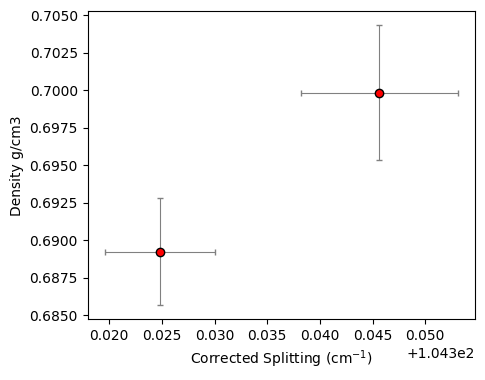

In [18]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [19]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

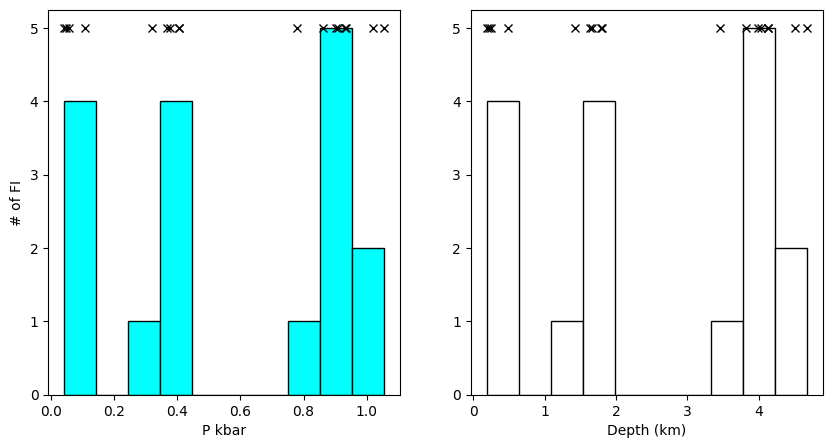

In [20]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')